In [1]:
import numpy as np
from numpy.polynomial import chebyshev as C

In [29]:
def get_disc_grid(disc_pts, x_rec=None):
    if x_rec is None:
        x_rec = np.arange(0, 1, 1 / disc_pts)
    arrays = [x_rec, x_rec]
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [3]:
x_grid = get_disc_grid(100)

In [13]:
def sobolev(f, cn=3):
    sobolev_norm_alphas = []
    cur_ders = [f]
    for _ in range(cn+1):
        sobolev_norm_alpha = np.max([np.max(np.abs(C.chebval2d(x_grid[:,0], x_grid[:,1], der))) for der in cur_ders])
        sobolev_norm_alphas.append(sobolev_norm_alpha)

        next_ders = []
        for der in cur_ders:
            for axis in range(2):
                next_ders.append(C.chebder(der, axis=axis))
        cur_ders = next_ders
    print(sobolev_norm_alphas)
    return np.sum(sobolev_norm_alphas)

In [211]:
def f(x, y):
    return x ** 3 + y ** 2

In [137]:
def df_dx(x, y):
    return 3 * x ** 2

In [138]:
def df_dy(x, y):
    return 2 * y

In [159]:
max_f     = np.max(np.abs(f(x_grid[:,0], x_grid[:,1])))
max_df_dx = np.max(np.abs(df_dx(x_grid[:,0], x_grid[:,1])))
max_df_dy = np.max(np.abs(df_dy(x_grid[:,0], x_grid[:,1])))

print(max_f)
print(max_df_dx)
print(max_df_dy)

1.941192
3.0
2.0


In [212]:
from scipy.fftpack import dct

cheb_grid  = get_disc_grid(None, C.chebpts1(K))
cheb_vals  = f(cheb_grid[:,0], cheb_grid[:,1]).reshape((K, K))
cheb_coeff = dct(dct(cheb_vals.T).T) 

In [355]:
def f1D(x):
    return np.exp(-x ** 2)

In [356]:
"""
f = f(end:-1:1,:);
A = size(f); N = A(1); 
if exist('A(3)', 'var') && A(3)~=1
    for i=1:A(3)
        a(:,:,i) = sqrt(2/N) * dct(f(:,:,i));
        a(1,:,i) = a(1,:,i) / sqrt(2);
    end
else
    a = sqrt(2/N) * dct(f(:,:,i));
    a(1,:)=a(1,:) / sqrt(2);
end
"""

K = 100
test_pts  = C.chebpts1(K)
cheb_vals = f1D(test_pts)[::-1]

In [357]:
DFT = np.fft.fft(np.hstack((cheb_vals, cheb_vals[K - 2: 0: -1]))).real / (2 * K - 2)

chebyshev_coefficients = DFT[:K] * 2
chebyshev_coefficients[0]  /= 2
chebyshev_coefficients[-1] /= 2    

In [358]:
test_xs = np.arange(-0.5, 0.5, 0.05)
true    = f1D(test_xs)
recon   = C.chebval(test_xs, chebyshev_coefficients)

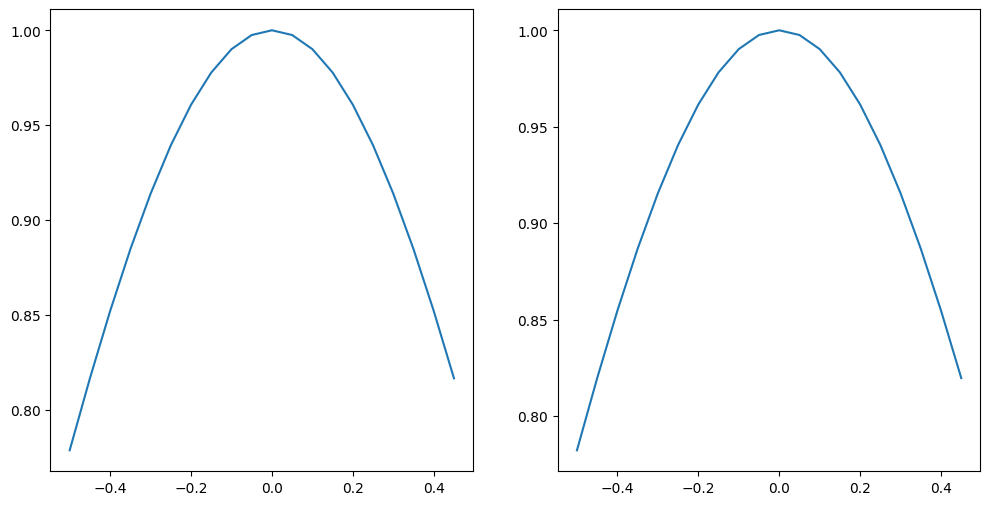

In [359]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(test_xs, true)
ax[1].plot(test_xs, recon)

In [214]:
N = 100
x_grid = get_disc_grid(None, 2 * (np.arange(0, 1, 1 / N) - 0.5))
true  = f(x_grid[:,0], x_grid[:,1]).reshape((N, N))
recon = C.chebval2d(x_grid[:,0], x_grid[:,1], cheb_coeff).reshape((N, N))[::-1,:]

In [215]:
np.max(np.abs(recon)) / np.max(np.abs(true))

25757.369698618168

In [181]:
sobolev(cheb_coeff)

[1.2860417113263476, 1.0895384182762422, 10.30926592146758, 118.50861128118775]


131.19345733225794

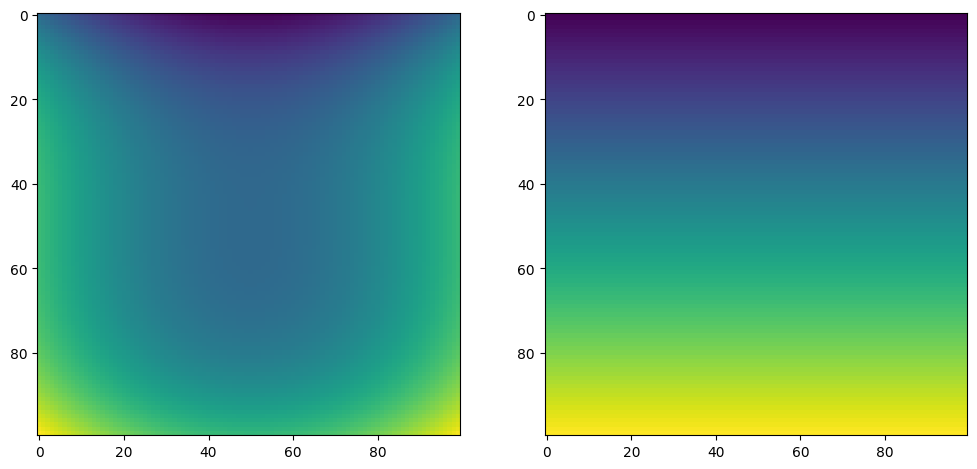

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(true.reshape(100, 100))
ax[1].imshow(recon.reshape(100, 100))